In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [4]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [7]:
df['Dataset'] = np.where(df['Dataset'] == 1, 0, 1)

0    414
1    165
Name: Dataset, dtype: int64

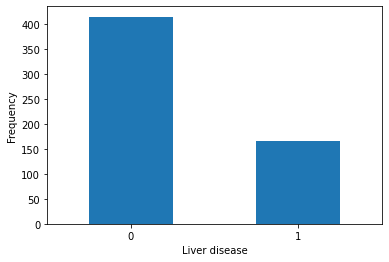

In [8]:
count_disease=pd.value_counts(df['Dataset'],sort=True)
count_disease.plot(kind='bar',rot=0)
plt.xticks(range(2),labels=[0,1])
plt.xlabel("Liver disease")
plt.ylabel("Frequency")
df.Dataset.value_counts()

In [9]:
df = pd.get_dummies(df,columns=['Gender'])

In [10]:
X=df.drop(['Dataset'],axis=1)
y=df['Dataset']

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

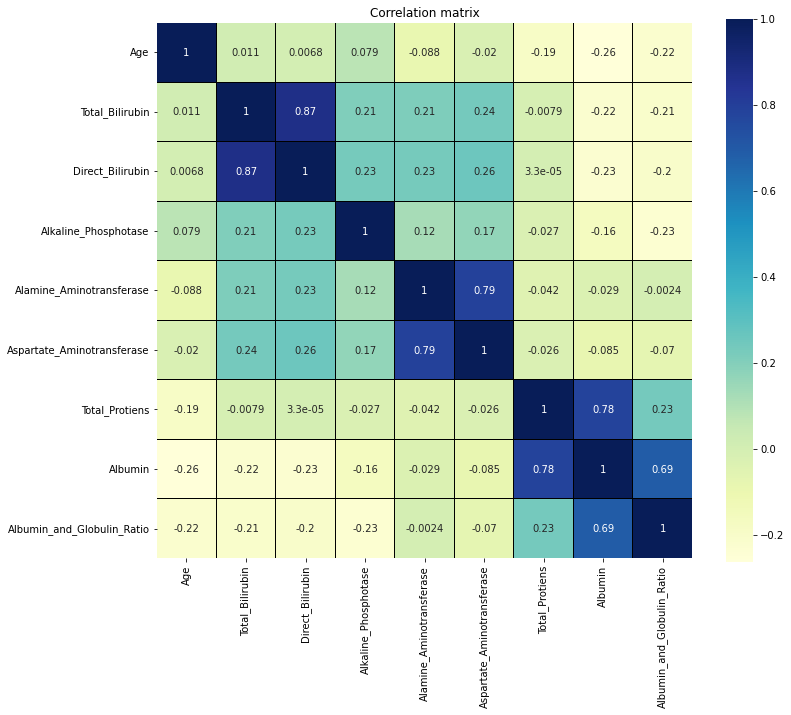

In [12]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Correlation matrix')
# Draw the heatmap using seaborn
sns.heatmap(df.drop(['Gender_Male','Gender_Female','Dataset'],axis=1).astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df.drop(['Gender_Male','Gender_Female','Dataset'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.620595,Age
1,5.478220,Total_Bilirubin
2,5.736607,Direct_Bilirubin
3,2.646475,Alkaline_Phosphotase
4,3.297689,Alamine_Aminotransferase
5,3.193323,Aspartate_Aminotransferase
6,96.995070,Total_Protiens
7,130.460658,Albumin
8,24.832747,Albumin_and_Globulin_Ratio


In [14]:
X=df.drop(['Dataset','Gender_Male','Gender_Female','Albumin','Total_Protiens','Total_Bilirubin'],axis=1)
from sklearn import metrics
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [15]:
from imblearn.combine import SMOTEENN 
smote=SMOTEENN()
X_resample,y_resample = smote.fit_resample(X,y)
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resample,y_resample, test_size=0.2, random_state=2)
from collections import Counter
print("Before SMOTE: ",Counter(y_train))
print("After SMOTE: ",Counter(y_train_smote))

Before SMOTE:  Counter({0: 332, 1: 131})
After SMOTE:  Counter({1: 202, 0: 162})


In [16]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=0.90)
#X_train_smote=pca.fit_transform(X_train_smote)
#X_test_smote=pca.fit_transform(X_test_smote)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 200]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'min_samples_split': min_samples_split,

               'min_samples_leaf': min_samples_leaf,

               'bootstrap': bootstrap}
model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 3, cv =3, verbose=2, random_state=2)
rf_random.fit(X_train_smote, y_train_smote)
parameters = rf_random.best_params_
print(parameters)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; tot

In [18]:
model = RandomForestClassifier(n_estimators= 200,min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=False)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.96      1.00      0.98        52

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91

Training accuracy 0.9972527472527473
Testing accuracy: 0.978021978021978


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test_smote)
y_pred_train = model.predict(X_train_smote)
print(metrics.classification_report(y_test_smote,y_pred,labels=[0,1]))
print("Training accuracy",metrics.accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test_smote,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.91      0.96      0.93        52

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

Training accuracy 0.989010989010989
Testing accuracy: 0.9230769230769231


In [20]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
folds.get_n_splits(X)
def get_score(model):
  for train_index, test_index in folds.split(X):
    model.fit(X_train_smote, y_train_smote)
    return model.score(X_test_smote,y_test_smote)
  

In [21]:
print("Random Forest model score: ",get_score(RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='log2',max_depth=15,bootstrap=False)))
print("XGB Classifier model score: ",get_score(XGBClassifier()))

Random Forest model score:  0.945054945054945
XGB Classifier model score:  0.9230769230769231
